# Preparation

In [23]:
# Rocks and Mines Dataset
import pandas as pd
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
import numpy as np
df[60]=np.where(df[60]=='R',0,1) # dependent variable
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0


In [24]:
# Wines Dataset
import pandas as pd
from pandas import DataFrame
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
w_df = pd.read_csv(url,header=0,sep=';')
w_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Exploratory

- Exam quantile can help identify outliers
- Can also use plot to explore

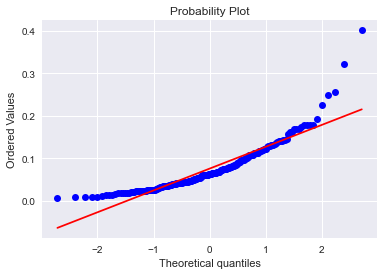

In [34]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df[4], dist="norm", plot=pylab) # the redline is where the normal distribution should be
pylab.show()

- Correlations

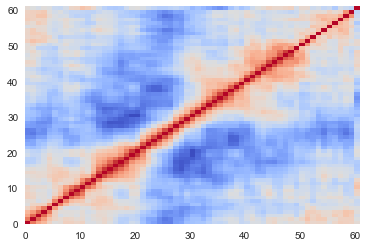

<AxesSubplot:>

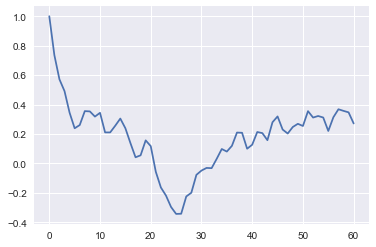

In [35]:
df.corr()

import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

df.corr()[0].plot() # correlation between column 0 and all other columns

# SKlearn - Linear Regression

In [2]:
!pip install sklearn --upgrade

### Train model and get predictions

In [9]:
# 1. Split training and testing data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
# 80:20 or 70:30 would be good
# train_test_split create random collection

x_train = train.iloc[0:,0:60]
y_train = train[60]
x_test = test.iloc[0:,0:60]
y_test = test[60]

# 2. Create model and fit the training data to it
from sklearn import linear_model
model = linear_model.LinearRegression() # create an empty model
model.fit(x_train,y_train) # fit the data to the model

# 3. Predict Y value
testing_predictions  = model.predict(x_test)

# 4. Decide threshold to do classification
def get_classification(predictions,threshold):
    classes = np.zeros_like(predictions) # The shape and data-type of predictions define these same attributes of the returned array
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

In [10]:
get_classification(testing_predictions,0.5)

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

### Evaluate Classifier

In [12]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,0.5)).ravel()

In [13]:
confusion_matrix(y_test,get_classification(testing_predictions,0.5)) # (y_true,y_pred)

array([[22,  9],
       [11, 21]], dtype=int64)

True Positive Rate/Sensitivity/Recall = tp/(tp+fn)
- the proportion of true positive cases that are correctly identified as positive

In [14]:
tpr = tp/(tp+fn)

True Negative Rate/Specificity = tn/(tn+fp)
- the proportion of true negative cases that are correctly identified as negative

In [15]:
tnr = tn/(tn+fp)

False Positive Rate/Fall Out = fp/(tn+fp)
- the proportion of true negative cases that are identified as positive

In [16]:
fpr = fp/(tn+fp)

Precision = tp/(tp+fp)
-  the proportion of cases identified as positive that are actually positive

In [17]:
precision = tp/(tp+fp)

f-score
- Precision tells us how well our model discriminates区分 amongst cases it identifies as positive. A precision of 1 would mean that if our model says something is positive, it is definitely a positive.
- Recall（tpr) tells us how good the model is at finding positives (a recall of 1 would mean it has found all positives).
- Precision does not tell us how good we are at finding positives while recall does not tell us how good our model is at disciminating
- The f-score combines the two into a single score

In [18]:
f = precision*tpr/(precision+tpr)*2

Accuracy
- Accuracy measures how accurately the model classifies things as positive or negative
- An accuracy of 1 would mean that our model has classified everything correctly

Misclassification Rate
- Misclassifican rate is the inverse of accuracy. What proportion of the cases are misclassified?

In [19]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)

**ROC Curve**

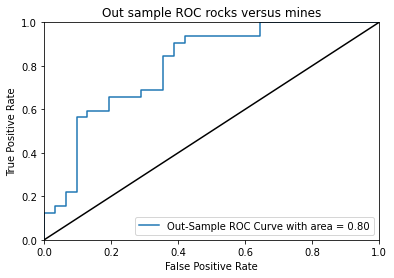

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

testing_predictions = model.predict(x_test)
(fpr, tpr, thresholds) = roc_curve(y_test,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

**Precision-recall curve**
- tells us how well we're doing on both factors for different threshold values

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.78')

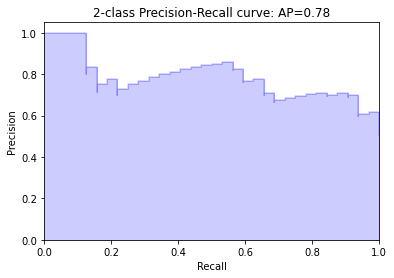

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, testing_predictions)
average_precision = average_precision_score(y_test, testing_predictions)

step_kwargs = ({'step' : 'post'})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# Decision Tree

## Description

Pros:

- Can handle "mixed" categorical(male/female) and numerical (age, number of siblings) data
- **Can handle missing data**
- Can be used to generate partial "good" solutions

Cons:
- Finding an optimal tree is a hard problem
- Overfitting is a huge problem

Types of decision trees

**Classification trees:** when the target variable is a set of unordered two or more categories (rocks or mines)
- Classification trees recursively split the data on a feature value
- Each split minimizes the entropy (also known as the impurity)
- Entropy is commonly measured using the GINI cost function (a measure of the probability of misclassification or 'purity')

**Regression trees:** when the target variable is continuous and ordered (wine quality from 0 to 10)
- Also split the data on feature values
- Minimize cost (impurity). Usually the mean squared error

**Stopping and Pruning Rules**
- A minimum count of observations in each leaf node
- A maximum tree depth
- A maximum complexity (the number of splits)
Using all three, you won't necessarily have a balanced tree

## DecisionTreeRegressor

In [29]:
# 1. Split training and testing data
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]

# 2. Create DecisionTreeRegressor, fit the training data and predict the test data

# from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
# model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

# 3. Predict Y value
y_pred  = model.predict(x_test)

### Regression Evaluation

In [31]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
from sklearn.metrics import r2_score
print("Testing R-Square",r2_score(y_test,y_pred)) #(y_ture,y_pred)

Training R-Square 0.3350430839688563
Testing R-Square 0.3191254404734829
Testing R-Square 0.3191254404734829


## DecisionTreeClassifier

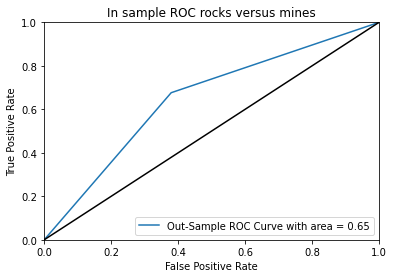

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# 1.
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]

# 2.
model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

# 3.
p_test = model.predict(x_test)

# 4.
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability) black line
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

In [33]:
p_test_prob = model.predict_proba(x_test)
p_test_prob[:5] # [prob of category 0, prob of category 1]

array([[0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.75      , 0.25      ]])

# Random Forest

### Description

- Row sampling + Feature sampling, ok with missing values unhandled
- Voting decision

### Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
# hyperparameters: depth, stopping point, number of individual tree
model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

# The "score" function returns the accuracy of the model (percentage correctly classified)
print("Accuracy of the Random Forest Classifier is: ", model.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
print(cfm)

Accuracy of the Random Forest Classifier is:  0.6984126984126984
[[20  9]
 [10 24]]


### Feature Importance

For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it

Text(0.5, 0, 'Relative Importance')

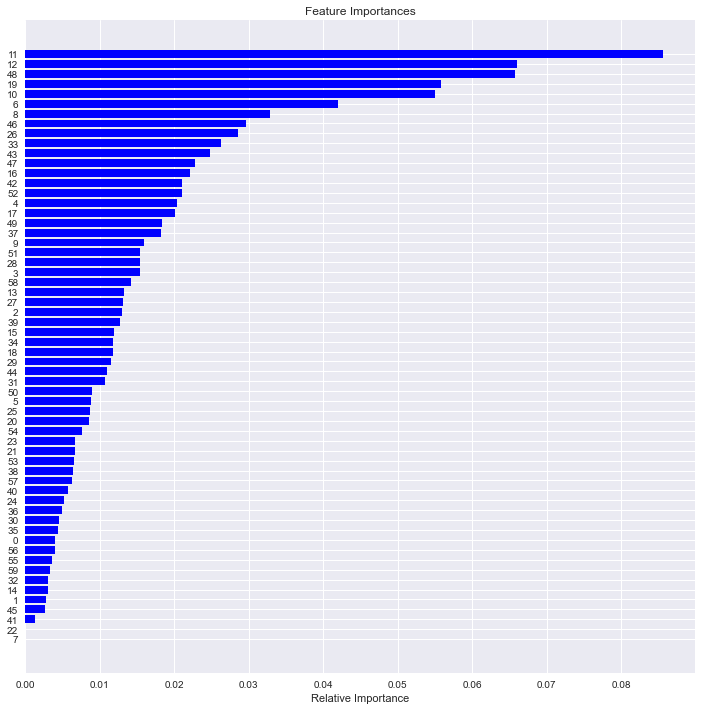

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = model.feature_importances_
indices = np.argsort(importances)
# Returns the indices that would sort an array.
# Perform an indirect sort along the given axis using the algorithm specified by the "kind" keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.
feature_names = [key for key in df if not key==60]
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [47]:
len(importances)

60

In [49]:
indices

array([ 7, 22, 41, 45,  1, 14, 32, 59, 55, 56,  0, 35, 30, 36, 24, 40, 57,
       38, 53, 21, 23, 54, 20, 25,  5, 50, 31, 44, 29, 18, 34, 15, 39,  2,
       27, 13, 58,  3, 28, 51,  9, 37, 49, 17,  4, 52, 42, 16, 47, 43, 33,
       26, 46,  8,  6, 10, 19, 48, 12, 11], dtype=int64)

### Find the best ensemble

GridSearchCV
- Using a gridsearch, we can run the random forest classifier on various parameter combinations
- And then use the classifier with the best accuracy score

In [57]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV 直接把所有4*3*6*3 combination试完，找到最合适的

parameters = {
     'n_estimators':(10, 30, 50), #the number of individual trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8), #how many nodes a middle node break into
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(random_state=0),parameters,cv=3) #cv = integer, to specify the number of folds in a (Stratified)KFold, 
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

(0.7997448979591836,
 {'max_depth': 5,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 10})

# Bagging Tree

- Ensemble technique: Bagging, also known as Bootstrap Aggregation
- Bagging chooses a random sample from the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap.
- Each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.
- Not ok with missing value unhandled

In [53]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

0.6984126984126984

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 50),
     'max_samples':(30,40,50),
     'max_features':(5,10,20),     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_ # Accuracy is the default score to determine the best combination

(0.7864229024943311,
 {'max_features': 5, 'max_samples': 50, 'n_estimators': 50})

In [55]:
model2=BaggingClassifier(max_features=5,max_samples=50,n_estimators=50)
model2.fit(x_train,np.ravel(y_train))
model2.score(x_test,y_test)

0.746031746031746